In [38]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Load data
df = pd.read_csv("Data/PreprocessedCar.csv")


In [40]:
#Discriptive statistics for numeric colums

# Define true continuous numeric columns (excluding encoded categorical ones like 'Fuel Types')
numeric_cols = ['Battery Capacity_CC', 'HorsePower_hp', 'Total Speed_km/h',
                'Acceleration_0_100_sec', 'Seats', 'Torque_Nm', 'Cars Prices_USD']

# Compute statistics
stats_df = pd.DataFrame(index=numeric_cols)
stats_df['mean'] = df[numeric_cols].mean()
stats_df['median'] = df[numeric_cols].median()
stats_df['mode'] = df[numeric_cols].mode().iloc[0]
stats_df['min'] = df[numeric_cols].min()
stats_df['max'] = df[numeric_cols].max()
stats_df['std'] = df[numeric_cols].std()
stats_df['variance'] = df[numeric_cols].var()

# Display results
print(stats_df)


                                mean   median      mode     min       max  \
Battery Capacity_CC      2701.742260   2480.0    5603.0   360.0    5603.0   
HorsePower_hp             277.176029    247.0     340.0    26.0     690.5   
Total Speed_km/h          212.033312    200.0     250.0    90.0     330.0   
Acceleration_0_100_sec      7.891182      7.4       5.4     1.9      16.2   
Seats                       5.000000      5.0       5.0     5.0       5.0   
Torque_Nm                 399.366623    362.0     400.0    45.0     930.0   
Cars Prices_USD         50531.404964  41295.0  124332.5  4000.0  124332.5   

                                 std      variance  
Battery Capacity_CC      1324.784375  1.755054e+06  
HorsePower_hp             165.736654  2.746864e+04  
Total Speed_km/h           46.719335  2.182696e+03  
Acceleration_0_100_sec      3.254267  1.059026e+01  
Seats                       0.000000  0.000000e+00  
Torque_Nm                 213.625396  4.563581e+04  
Cars Prices_

In [41]:
print("Fuel Types Mode:", df['Fuel Types'].mode()[0])
print("Fuel Type Value Counts:\n", df['Fuel Types'].value_counts())


Fuel Types Mode: Petrol
Fuel Type Value Counts:
 Fuel Types
Petrol            1125
Diesel             183
Hybrid             110
Electric            99
Plug-in Hybrid       8
Hydrogen             3
Cng                  1
Name: count, dtype: int64


In [42]:
# Remove rows where 'Fuel Types' is 'Cng'
df = df[df['Fuel Types'] != 'Cng']

# Confirm removal
print(df['Fuel Types'].value_counts())


Fuel Types
Petrol            1125
Diesel             183
Hybrid             110
Electric            99
Plug-in Hybrid       8
Hydrogen             3
Name: count, dtype: int64


In [43]:
df.reset_index(drop=True, inplace=True)


The distribution of numeric features discribes important trends about the car market. Battery capacity shows a multi-modal pattern with distinct peaks around 2000, 3000, and 5500 CC, reflecting standardized engine configurations among manufacturers. 

Horsepower follows a right-skewed distribution, with the majority of cars falling between 100–300 HP, indicating that the dataset is dominated by economy and mid-range vehicles, while high-performance models remain less common. 

Top speed approximates a normal distribution, around 180–220 km/h, which aligns with standard capabilities of modern passenger vehicles; outliers beyond 300 km/h suggest a presence of sports cars. 

acceleration times (0–100 sec) are slightly left-skewed, with most vehicles reaching 100 km/h in 5–9 seconds, representing typical consumer expectations, while extreme values reflect either very fast or very slow models. 

Torque is right-skewed, concentrated between 150–400 Nm, and tapers off into high-performance territory above 800 Nm. Lastly, car prices are strongly right-skewed, with most vehicles priced under $60,000, and a long tail representing luxury or premium models exceeding $100,000.


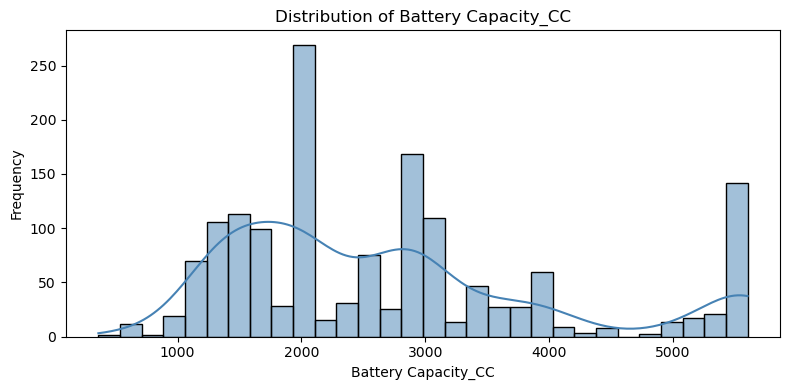

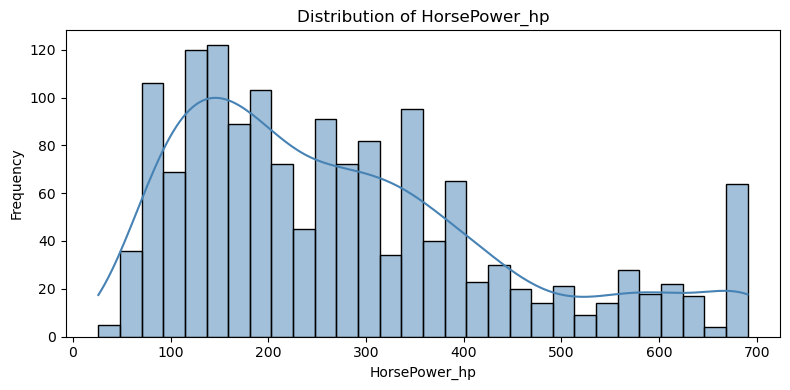

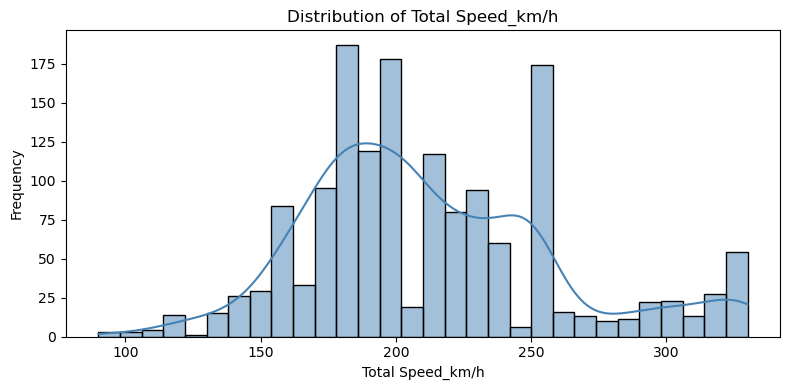

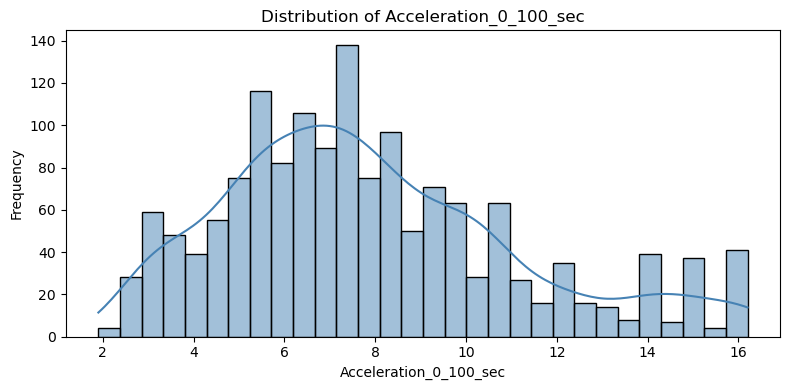

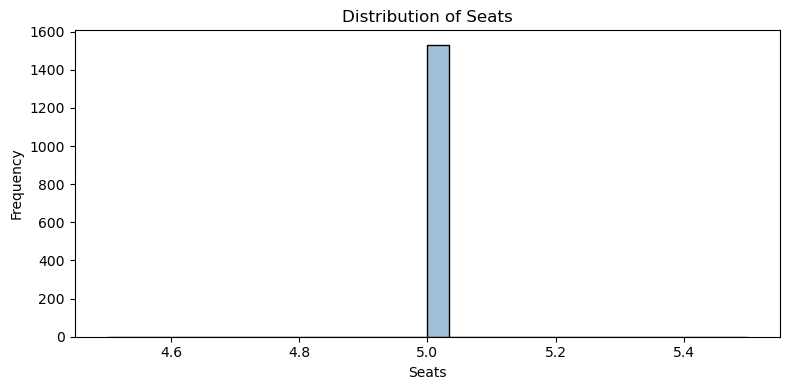

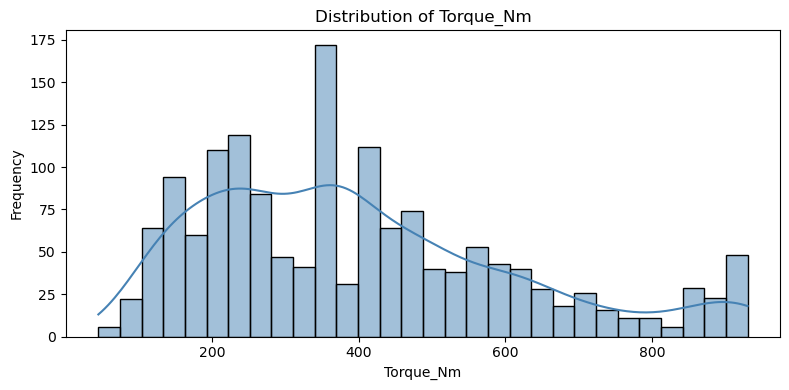

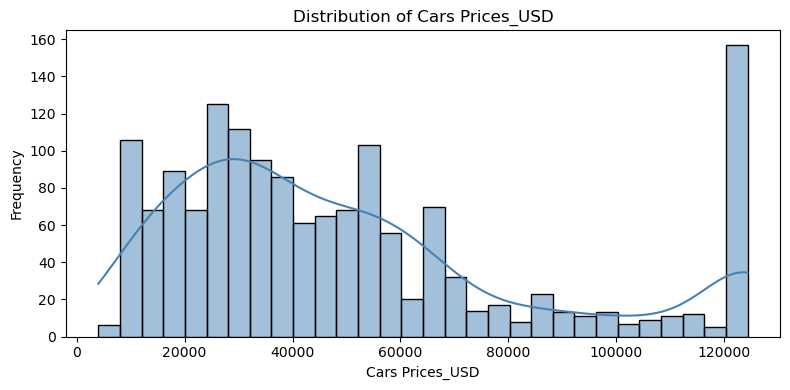

In [44]:
#Check Distribution of Numerical Features
numeric_cols = ['Battery Capacity_CC', 'HorsePower_hp', 'Total Speed_km/h',
                'Acceleration_0_100_sec', 'Seats', 'Torque_Nm', 'Cars Prices_USD']

# Histograms 
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='steelblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

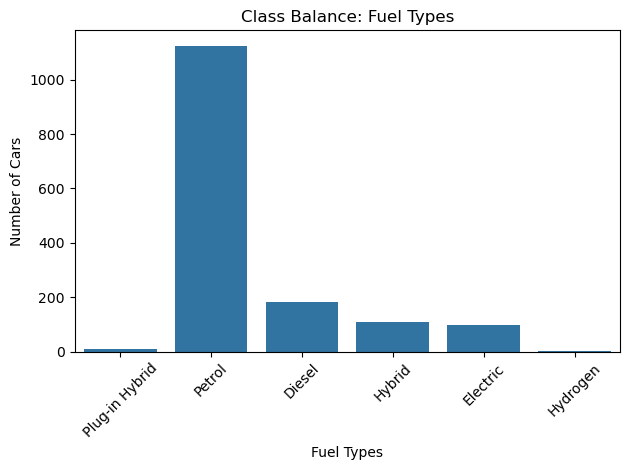

Fuel Types
Petrol            1125
Diesel             183
Hybrid             110
Electric            99
Plug-in Hybrid       8
Hydrogen             3
Name: count, dtype: int64


In [45]:
#Check Class Balance for Categorical Features
sns.countplot(x='Fuel Types', data=df)
plt.title("Class Balance: Fuel Types")
plt.ylabel("Number of Cars")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(df['Fuel Types'].value_counts())

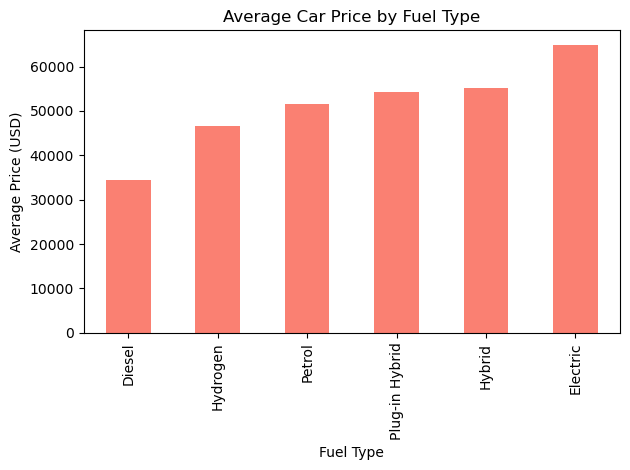

In [46]:
#Average price per fuel type
df.groupby('Fuel Types')['Cars Prices_USD'].mean().sort_values().plot(kind='bar', color='salmon')
plt.title('Average Car Price by Fuel Type')
plt.ylabel('Average Price (USD)')
plt.xlabel('Fuel Type')
plt.tight_layout()
plt.show()


<hr>

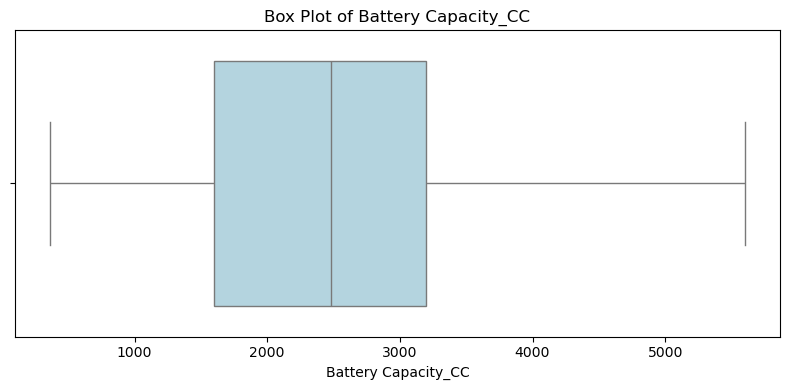

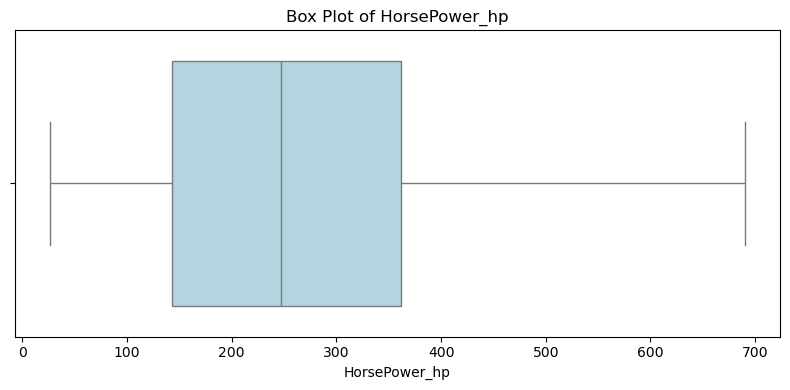

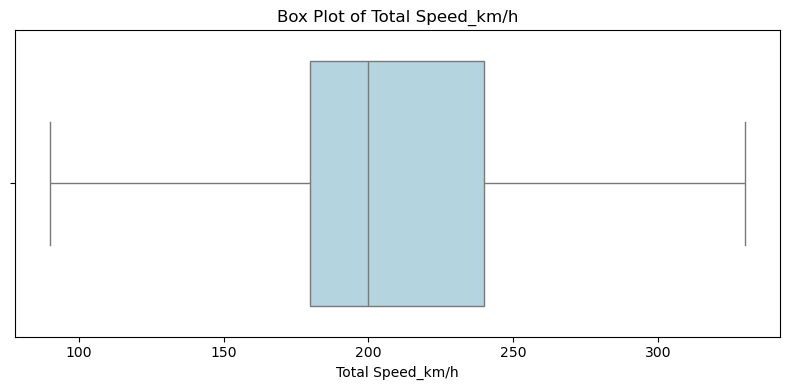

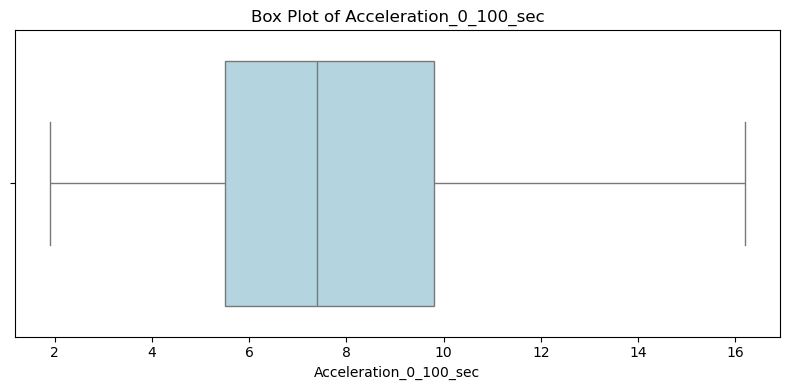

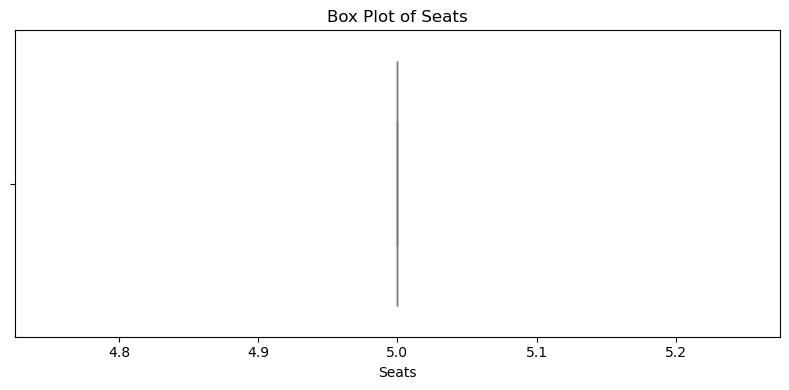

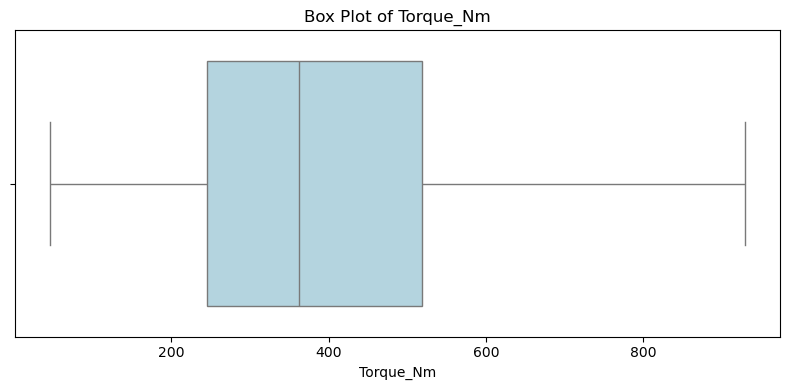

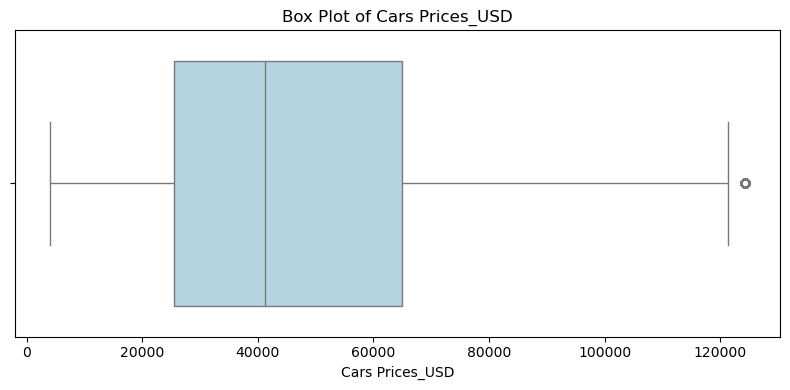

In [53]:
#Outlier Detection by Box plots as I tried to fix outliers but we will see
numeric_cols = ['Battery Capacity_CC', 'HorsePower_hp', 'Total Speed_km/h',
                'Acceleration_0_100_sec', 'Seats', 'Torque_Nm', 'Cars Prices_USD']

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()

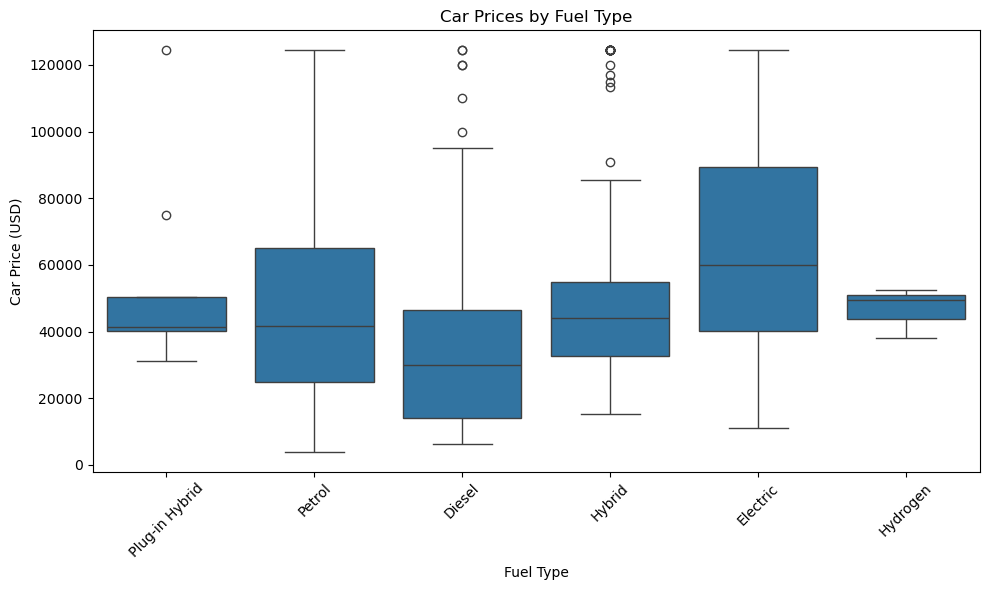

In [47]:
# Plot distribution of fuel types vs car prices
# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel Types', y='Cars Prices_USD', data=df)
plt.title("Car Prices by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Car Price (USD)")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

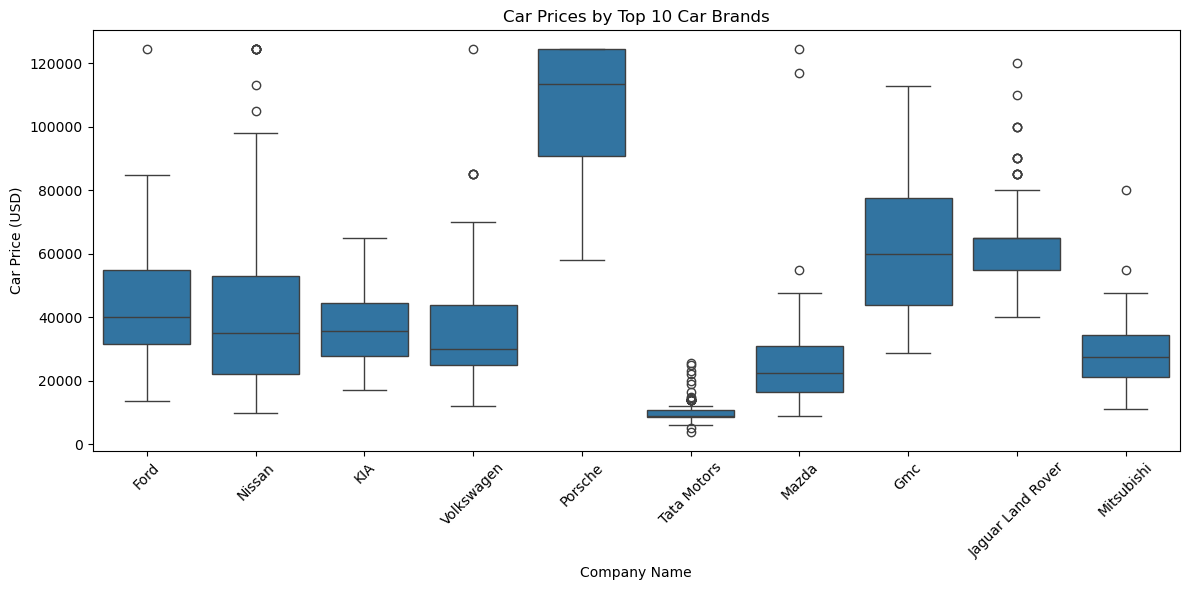

In [48]:
# Get top 10 companies by count
top_companies = df['Company Names'].value_counts().nlargest(10).index

# Filter the dataset
df_top_companies = df[df['Company Names'].isin(top_companies)]

# boxlot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company Names', y='Cars Prices_USD', data=df_top_companies)
plt.title("Car Prices by Top 10 Car Brands")
plt.xlabel("Company Name")
plt.ylabel("Car Price (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<hr>

This heatmap illustrates the relationships between the numeric features in the dataset (correlation).  HorsePower_hp and Torque_Nm are highly positively correlated with Car Prices (0.90 and 0.85 respectively), suggesting that vehicles with more power and torque tend to be more expensive. 
Acceleration exhibits a strong negative correlation with price (-0.73), meaning cars that accelerate faster (lower time) tend to be higher priced. Additionally, HorsePower_hp is strongly correlated with both Torque_Nm (0.90) and Top Speed (0.72), reflecting how performance metrics typically move together.

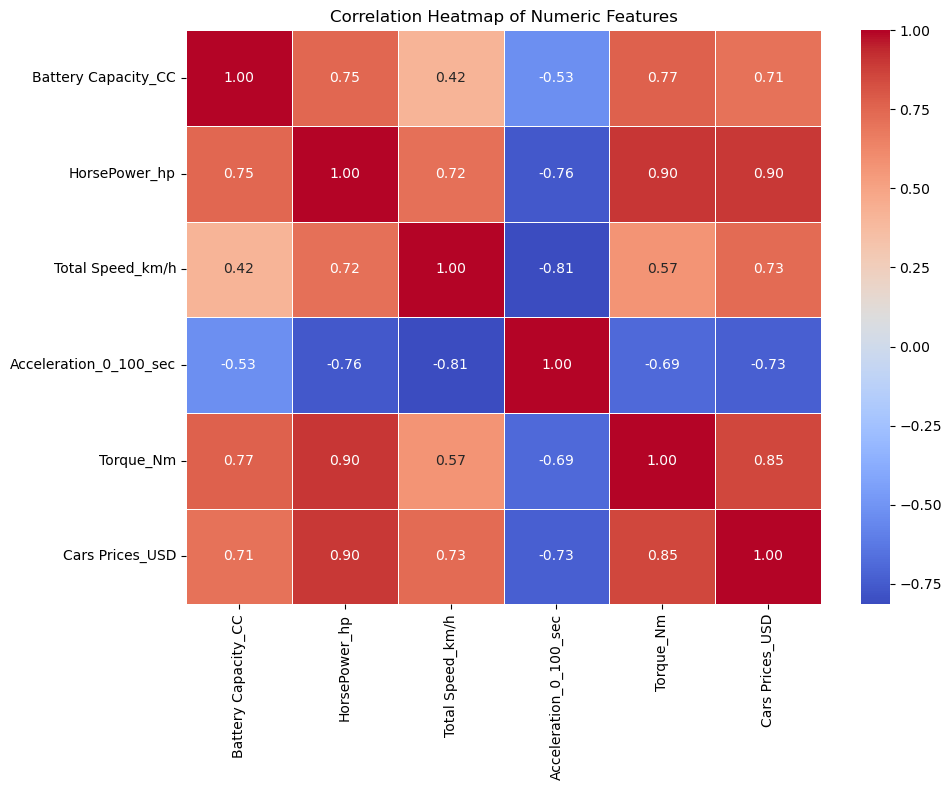

Top correlated features with price: ['Battery Capacity_CC', 'HorsePower_hp', 'Total Speed_km/h', 'Acceleration_0_100_sec', 'Torque_Nm', 'Cars Prices_USD']


In [50]:
# Select numeric columns
numeric_cols = ['Battery Capacity_CC', 'HorsePower_hp', 'Total Speed_km/h',
                'Acceleration_0_100_sec', 'Torque_Nm', 'Cars Prices_USD']

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()
target_corr = corr_matrix['Cars Prices_USD'].abs()
important_features = target_corr[target_corr > 0.6].index.tolist()
print("Top correlated features with price:", important_features)
#Pick only features with strong correlation to the target car prices

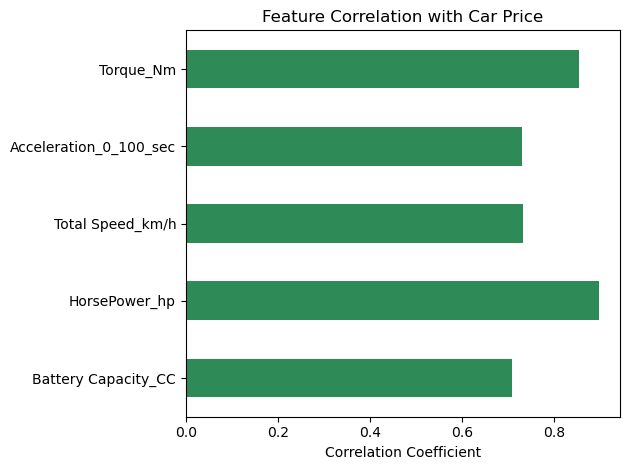

In [51]:
#Visualize Correlation with Bar Plot
target_corr.drop('Cars Prices_USD').plot(kind='barh', color='seagreen')
plt.title("Feature Correlation with Car Price")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()


<hr>

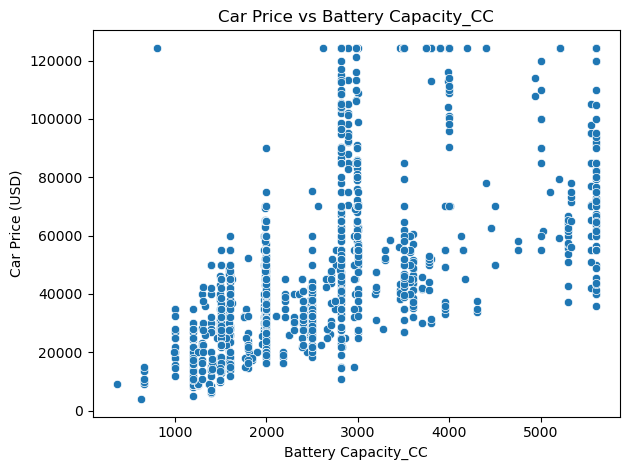

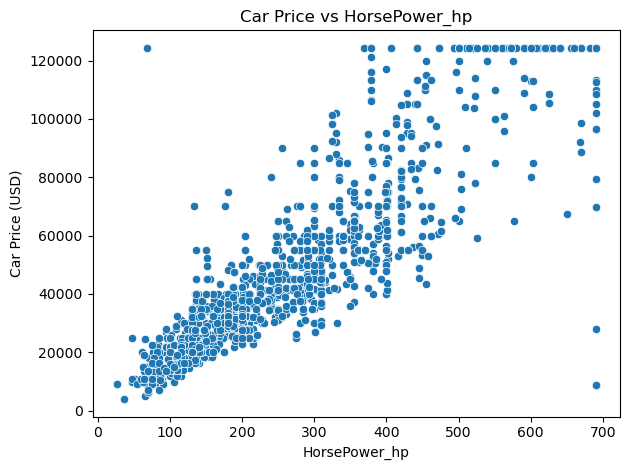

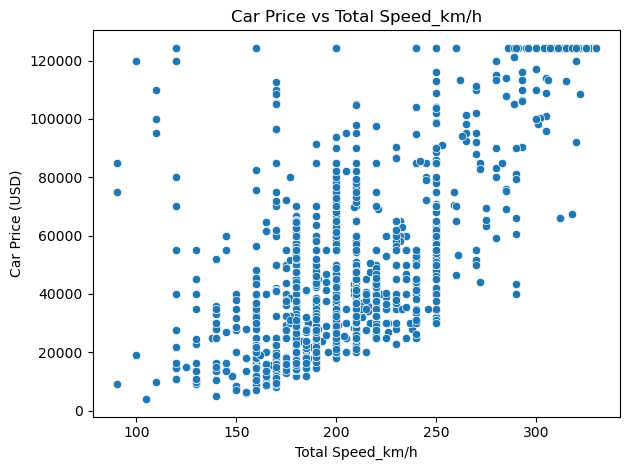

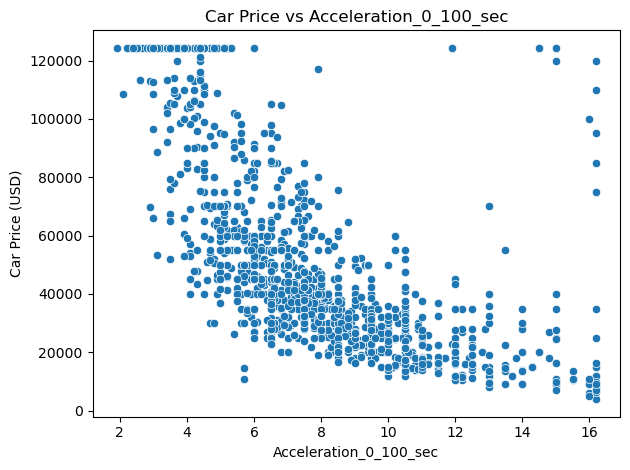

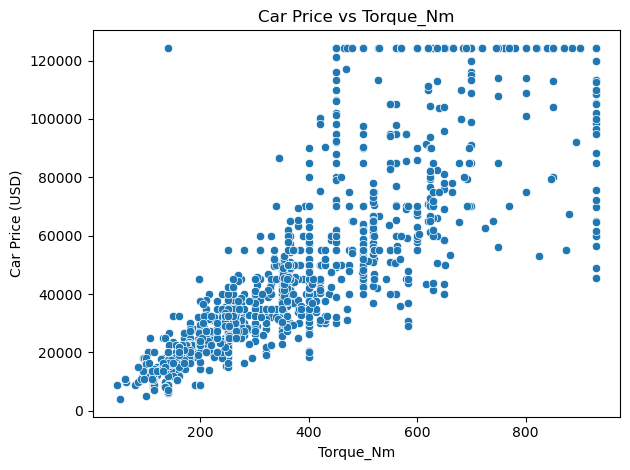

In [52]:
#Visualize Correlation with Scatter Plots
top_features = target_corr.drop('Cars Prices_USD').index.tolist()

for feature in top_features:
    sns.scatterplot(x=df[feature], y=df['Cars Prices_USD'])
    plt.title(f'Car Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Car Price (USD)')
    plt.tight_layout()
    plt.show()
